# DIGITAL IMAGE PROCESSING IN THE SPACE-FREQUENCY DOMAIN

## THE ANISOTROPIC QUALITY INDEX (AQI)    

**@author: Salvador Gabarda**

**salvador@optica.csic.es**

This is an alternative version of the notebook "001 Anisotropic Quality Index (AQI)". Here the the customized code is imported from the python script named "sgtools.py" which includes the Python functions for computing the Anisotropic Quality Index (AQI). Details and examples of this image quality assessment measure may be found in

S. Gabarda, G. Cristóbal, "Blind image quality assessment through anisotropy", JOSA A, 2007

https://scholar.google.es/citations?user=jPzi3LEAAAAJ&hl=es&oi=ao


*Created on Mar 24 2018, reviewed Dec 27 2019*


### 1. The code

We import required modules

We import some customized code from  *sgtools.py*

In [1]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.fftpack import fft, ifft
import math
from scipy import signal

#import sys  
#sys.path.insert(0, 'C:/Users/User/Python/External')
import sgtools as sgt

import os
os.path
cwd = os.getcwd()
print(cwd)

/home/nbuser/library


### 2. Input test image

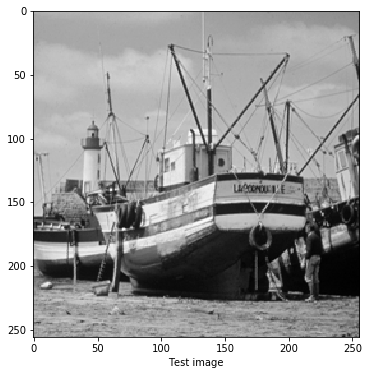

In [2]:
%matplotlib inline
# input test image
image_name = 'boat.png'
subfolder = ''
test_image = sgt.input_test_image(subfolder,image_name)
# show image version to be processed 
plt.figure(figsize =(6,6))
plt.imshow(test_image, cmap='gray')
plt.xlabel("Test image")
plt.show()

### 3. The Wigner distribution

This is an example to show the pseudo-Wigner distribution as a set of images

In [3]:
# calculate Wigner distribution of test image
seq_length = 9
angle = 0
distribution = sgt.layer_wigner_distribution(test_image,seq_length,angle)
# show distribution as a set of images
frequencies = sgt.show_wigner_frequencies(distribution)

### 4. Computation of image entropy

From the Wigner distribution of the test image we can calculate the image entropy. Entropy values are normalized from 0 to 1. The resulting image is saved as "Entropy.pdf" in the current directory. The pixelwise entropy is saved as "Entropy.npy".

global image entropy is 0.1064


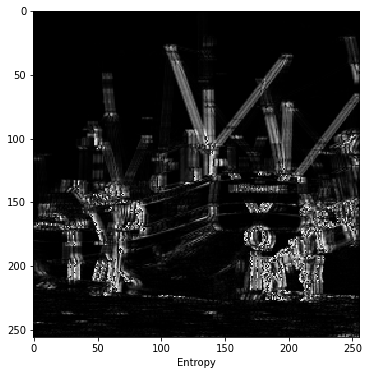

In [4]:
# show entropy as image
%matplotlib inline
order = 3 # this is a commom value
entropy = sgt.renyi_entropy(distribution,order)
entropy_global = np.mean(entropy)
print("global image entropy is %.4f" % entropy_global)

plt.figure(figsize =(6,6))
entropy = np.uint8(255*entropy)
plt.imshow(entropy,cmap='gray')
plt.xlabel("Entropy")
np.save("Entropy",entropy)
plt.savefig("Entropy.pdf")
plt.show()


### 5 Single example of Anisotropic Quality Index

This example shows the use of the code for calculating the AQI for a sigle image (the above test image)

In [5]:
orientations = 4
order = 3
seq_length = 9
anisotropy = sgt.layer_image_anisotropy(test_image,image_name,seq_length,orientations,order)

0.0  degrees distribution
entropy is 0.1064
45.0  degrees distribution
entropy is 0.1796
90.0  degrees distribution
entropy is 0.1369
135.0  degrees distribution
entropy is 0.1842


The AQI (image anisotropy) is 0.0320




### 6 Example of application of the AQI for comparing the quality of several related images

The following code runs a test over a set of images from TID2013 image database, corrupted with different amount of *Gaussian blur*, starting from the original and showing the measures in a graphic. The plot reveals how as more blur is added to the image the AQI value get smaller.

**Measures of the AQI are stored in file 'AQI test.txt'**

processing image  houses_00.png
0.0  degrees distribution
entropy is 0.2757
45.0  degrees distribution
entropy is 0.3049
90.0  degrees distribution
entropy is 0.1619
135.0  degrees distribution
entropy is 0.3467


The AQI (image anisotropy) is 0.0685


processing image  houses_01.png
0.0  degrees distribution
entropy is 0.2526
45.0  degrees distribution
entropy is 0.2787
90.0  degrees distribution
entropy is 0.1429
135.0  degrees distribution
entropy is 0.3206


The AQI (image anisotropy) is 0.0657


processing image  houses_02.png
0.0  degrees distribution
entropy is 0.2344
45.0  degrees distribution
entropy is 0.2579
90.0  degrees distribution
entropy is 0.1285
135.0  degrees distribution
entropy is 0.2998


The AQI (image anisotropy) is 0.0632


processing image  houses_03.png
0.0  degrees distribution
entropy is 0.1997
45.0  degrees distribution
entropy is 0.2184
90.0  degrees distribution
entropy is 0.1029
135.0  degrees distribution
entropy is 0.2594


The AQI (image anisotropy) 

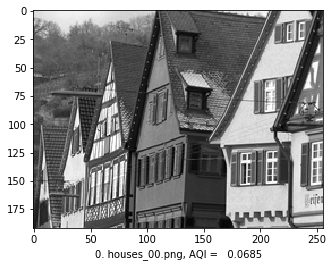

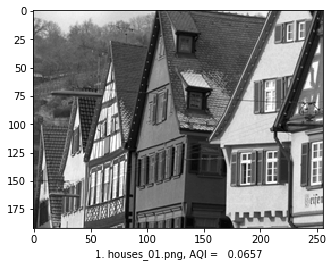

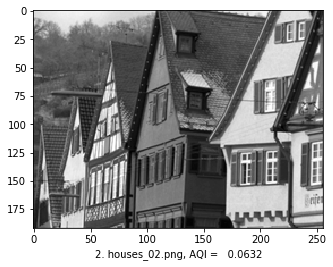

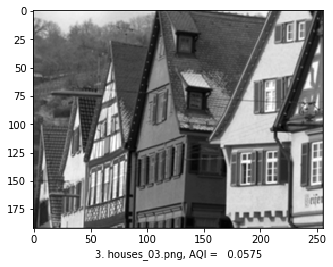

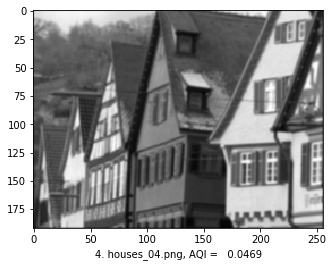

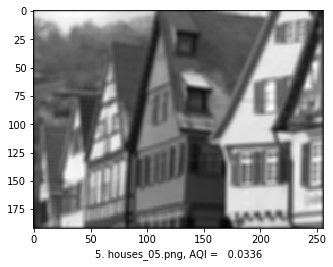

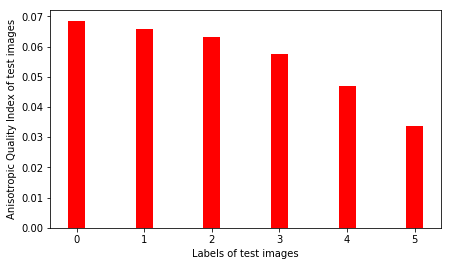

In [6]:
# initial conditions
orientations = 4
order = 3
seq_length = 9
R = 6 # number of test images
AQI =np.zeros(R)
y_pos = np.zeros(R)
subfolder = ''
for i in range(R):
    y_pos[i] = i
    # input test image
    image_name =  'houses_0' + str(i) + '.png'
    print("processing image ",image_name)
    test_image = sgt.input_test_image(subfolder,image_name)
    # process image
    anisotropy = sgt.layer_image_anisotropy(test_image,image_name,seq_length,orientations,order)
    
    AQI[i] = anisotropy
    # show processed image
    plt.figure()
    plt.imshow(test_image, cmap='gray')
    label = str(i) + ". " + image_name + ", AQI = " +  "  %.4f" % anisotropy
    plt.xlabel(label) 
    
# Test plot
plt.figure(figsize =(7,4))
plt.bar(y_pos, AQI,width = 1/4, align='center', alpha=1,color = "red")
plt.ylabel("Anisotropic Quality Index of test images")
plt.xlabel("Labels of test images")
plt.show()
    